# Polynomial fitting with the normal equations

Copyright (C) 2020 Andreas Kloeckner

<details>
<summary>MIT License</summary>
Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
THE SOFTWARE.
</details>

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as pt

In this demo, we will produce data from a simple parabola as a "model" and try to recover the "unknown" parameters $\alpha$, $\beta$, and $\gamma$ using least squares.

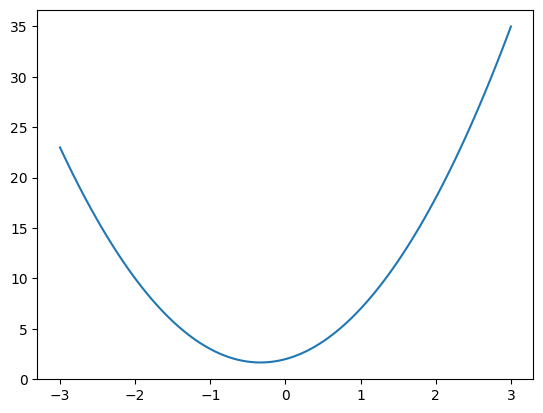

In [2]:
alpha = 3
beta = 2
gamma = 2

def f(x):
    return alpha*x**2 + beta*x + gamma

plot_grid = np.linspace(-3, 3, 100)

pt.plot(plot_grid, f(plot_grid))

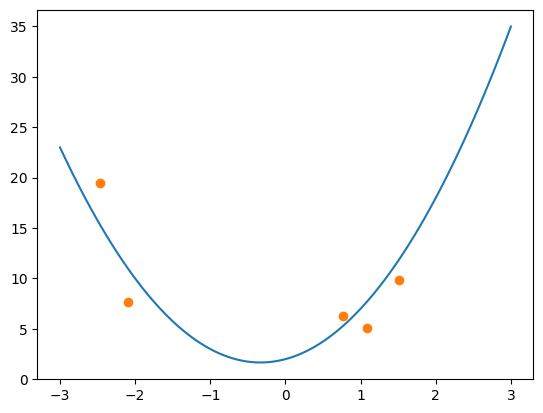

In [4]:
npts = 5

np.random.seed(22)
points = np.linspace(-2, 2, npts) + np.random.randn(npts)
values = f(points) + 0.3*np.random.randn(npts)*f(points)

pt.plot(plot_grid, f(plot_grid))
pt.plot(points, values, "o")

Now build the Vandermonde matrix:

In [5]:
A = np.array([
    np.ones(npts),
    points,
    points**2
    ]).T
print(A)

[[ 1.         -2.09194992  4.37625447]
 [ 1.         -2.46335065  6.06809644]
 [ 1.          1.08179168  1.17027324]
 [ 1.          0.76067483  0.5786262 ]
 [ 1.          1.50887086  2.27669128]]


And solve for `x` using the normal equations:

In [6]:
#clear
x = la.solve(A.T@A, A.T@values)
x

array([0.13178048, 1.84869187, 3.45132033])

Lastly, pick apart `x` into `alpha_c`, `beta_c`, and `gamma_c`:

In [7]:
#clear
gamma_c, beta_c, alpha_c = x

In [8]:
print(alpha, alpha_c)
print(beta, beta_c)
print(gamma, gamma_c)

3 3.45132033448219
2 1.8486918724769275
2 0.13178048424103878


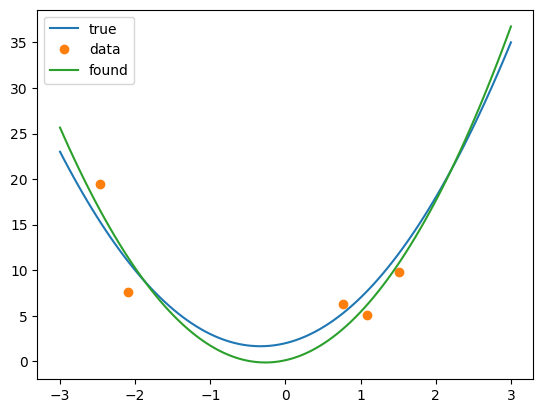

In [9]:
def f_c(x):
    return alpha_c*x**2 + beta_c*x + gamma_c

pt.plot(plot_grid, f(plot_grid), label="true")
pt.plot(points, values, "o", label="data")
pt.plot(plot_grid, f_c(plot_grid), label="found")
pt.legend()

<!--
gamma_c, beta_c, alpha_c = x
-->
(Edit this cell for solution.)